In [1]:
#Library Import
import cv2
import numpy as np
from skimage.feature import blob_log
from math import sqrt
import glob
from skimage.io import imread
from matplotlib import pyplot as plt
import imutils

In [3]:
# Running function parameters
ap = argparse.ArgumentParser()
ap.add_argument('-i','--image',required=True) #lokasi gambar
ap.add_argument('-j','--cropx',required=True) #crop horizontal (sumbu x)
ap.add_argument('-k','--cropy',required=True) #crop vertikal bertepatan dengan perbatasan air
args = vars(ap.parse_args())

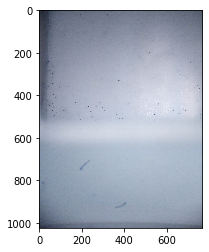

In [176]:
#Read and Rotate Image
img = cv2.imread("29_Jan.jpg")
img = imutils.rotate(img,180)
plt.imshow(img)
plt.savefig("rotate.jpg")

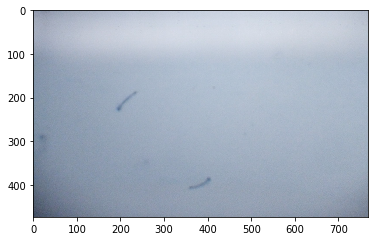

In [177]:
#Crop Image
h = img.shape[0]
w = img.shape[1]
# x = args["cropx"]
# y = args["cropy"]
# x = int(x)
# y = int(y)
img = img[520:h-30,0:w]
plt.imshow(img)
plt.savefig("crop.jpg")

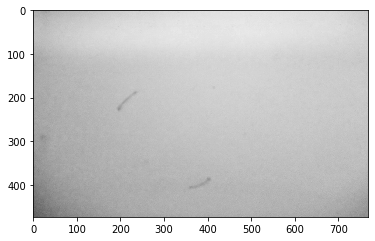

In [178]:
# Convert image to HSV and Split to get value part
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue ,saturation ,value = cv2.split(hsv)
plt.imshow(value, cmap="gray", vmin=0, vmax=255)
plt.savefig("value.jpg")

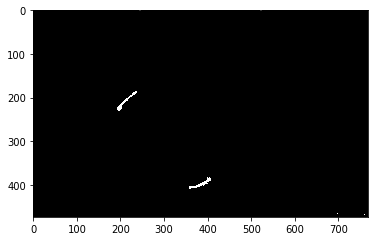

In [179]:
# Apply adaptive threshold with Gaussian
thresh = cv2.adaptiveThreshold(value, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 255, 13)
thresh = cv2.bitwise_not(thresh)
plt.imshow(thresh, cmap="gray", vmin=0, vmax=255)
plt.savefig("adaptive.jpg")

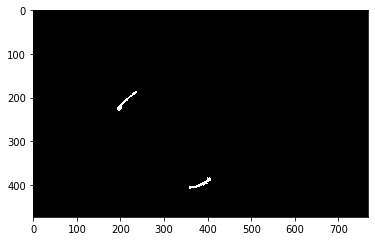

In [180]:
# Detecting blobs as noise
# Maximum blobs size
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
threshold_blobs_area = 20
# Loop over all contours and fill draw black color for area smaller than threshold.
for i in range(1, len(contours)):
    index_level = int(hierarchy[0][i][1])
    if index_level <= i:
        cnt = contours[i]
        area = cv2.contourArea(cnt)
        if area <= threshold_blobs_area:
            # Draw black color for detected blobs
            cv2.drawContours(thresh, [cnt], -1, 0, -1, 1)
plt.imshow(thresh, cmap="gray", vmin=0, vmax=255)
plt.savefig("blobs.jpg")

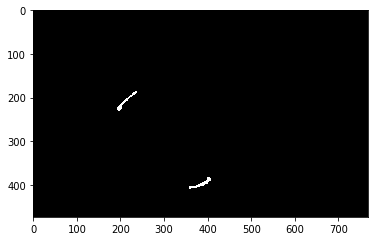

In [181]:
# Dilatation and erosion filter
kernel = np.ones((15,15), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
img_erode = cv2.erode(img_dilation,kernel, iterations=1)

plt.imshow(img_erode, cmap="gray", vmin=0, vmax=255)
plt.savefig("dilaterod.jpg")

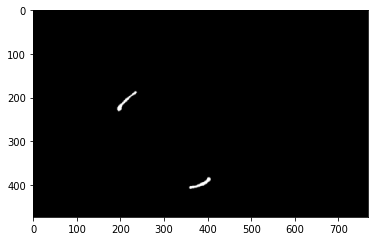

In [182]:
# clean all noise after dilatation and erosion
img_erode = cv2.medianBlur(img_erode, 5)
img_erode = cv2.GaussianBlur(img_erode,(5,5),0)
plt.imshow(img_erode, cmap="gray", vmin=0, vmax=255)
plt.savefig("dilaterodclean.jpg")

In [183]:
#Label and count the egg 
ret, labels = cv2.connectedComponents(img_erode)
label_hue = np.uint8(179 * labels / np.max(labels))

objects number is: 2


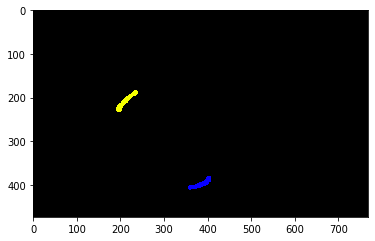

In [184]:
# result  
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0
plt.imshow(labeled_img)
print('objects number is:', ret-1)
plt.savefig("result.jpg")
# print(int(ret-2), end='')